# Ahmed Nabil Ibrahim Awaad 

Objective:  In This Assignment, You Will Apply different SVM classifiers on the iris dataset 

In [40]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# preprosessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

# metrics
from sklearn.metrics import classification_report, confusion_matrix

#model
from sklearn.svm import LinearSVC, SVC
from sklearn import svm

#settings
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

## 1- Load the data used in assignment 1.

In [41]:
#Read input dataset
data =  pd.read_csv('data\iris.data', header=None, names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'species'])

## 2- Data inspection. Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal_Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal_Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


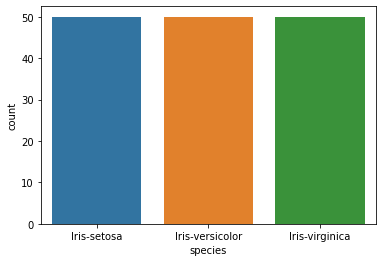

In [45]:
sns.countplot(data.species)
plt.show()

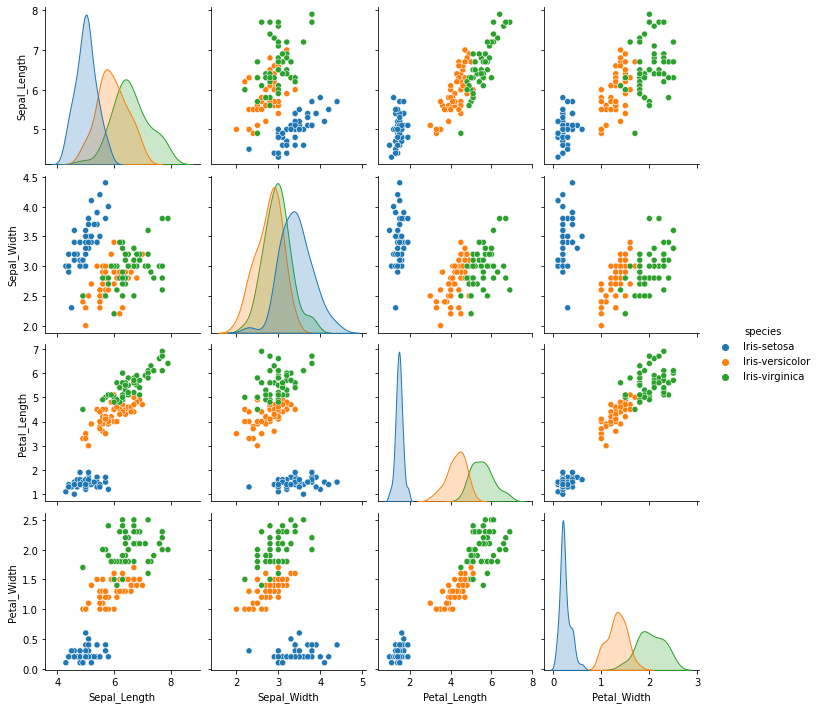

In [46]:
sns.pairplot(data, hue='species')
plt.show()

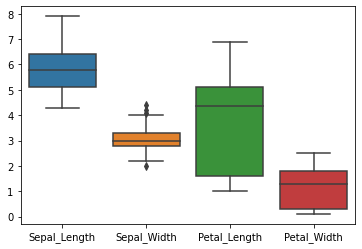

In [47]:
sns.boxplot(data = data)
plt.show()

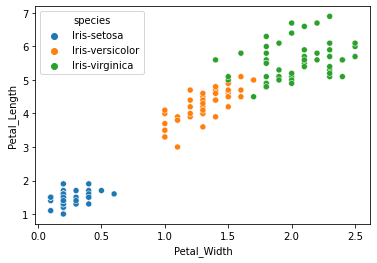

In [48]:
# from graph 'Petal_Width' vs. 'Petal_Length' separate the data very well
#  prepare scatter plots -  `petal_width` vs `petal_length`. 
sns.scatterplot(x ='Petal_Width',y = 'Petal_Length', data=data, hue='species');

## 3- Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:
*	Sepal length
*	Sepal width


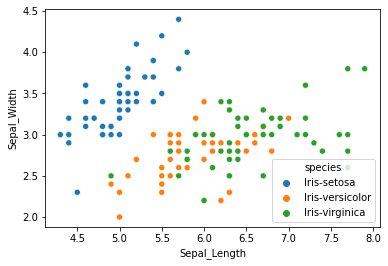

In [49]:
#  prepare scatter plots -  `Sepal length` vs `Sepal width`.
sns.scatterplot(x ='Sepal_Length',y = 'Sepal_Width', data=data, hue='species');

In [50]:
# encode category data
encoder = LabelEncoder()
data.species = encoder.fit_transform(data.species)

In [51]:
# Normalize Data
# scaler = MinMaxScaler()
scaler = StandardScaler()

columns_to_scale = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',]
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [52]:
# split data set

features = [
            'Sepal_Length', 'Sepal_Width',
            # 'Petal_Length', 'Petal_Width',
            ]

X_train, X_test= train_test_split(data, test_size=0.33, random_state=42, stratify=data['species'])

y_train = X_train['species']
y_test = X_test['species']
X_train = X_train[features]
X_test = X_test[features]

In [53]:
def get_accuracy(model):
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)

    print('{0:25} : {1:5}'.format('Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('Test Score',  Test_Score) )

In [54]:
def Plot_decision_surface(X, y, model, title, xlabel, ylabel, create_figure=True, figsize=(15,15), step=0.02, alpha=0.8, set_ticks = False, cmap=plt.cm.seismic):
    # step size in the mesh
    h = step
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    if create_figure:
        plt.figure(figsize=figsize)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

    # Plot also the training points
    sns.scatterplot(X[:, 0], X[:, 1], hue =y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not set_ticks:
        plt.xticks(())
        plt.yticks(())
    plt.title(title)

In [55]:
X = X_train.values
y = y_train

In [56]:
clf_model = LinearSVC(C=1, random_state=0, tol=1e-5).fit(X, y)
get_accuracy(clf_model)

Training Score            :  0.78
Test Score                :  0.78


In [57]:
svc_linear = svm.SVC(kernel='linear', C=1, random_state=0, tol=1e-5).fit(X, y)
get_accuracy(svc_linear)

Training Score            :  0.79
Test Score                :  0.74


In [58]:
clf_model = LinearSVC(C=1, random_state=0, tol=1e-5, loss='hinge', multi_class='crammer_singer').fit(X, y)
get_accuracy(clf_model)

Training Score            :  0.79
Test Score                :  0.72


> The key principles of that difference are the following:

* By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss. It is potential to manually outline a 'hinge' string for loss parameter in LinearSVC.

* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVCuses the One-vs-One multiclass reduction. It is also noted here. Also, for multi-class classification problem SVC fits N * (N - 1) / 2 models where N is the number of classes.

* LinearSVC, by contrast, simply fits N models. If the classification problem is binary, then just one model is slot in each situations. multi_class and decision_function_shape parameters have nothing in common. The second one is an aggregator that transforms the results of the decision function in a convenient shape of (n_features, n_samples). multi_class is an algorithmic approach to establish a solution.

* The underlying estimators for LinearSVC are liblinear, which does, in fact, penalize the intercept. SVC uses libsvm estimators that do not. liblinear estimators are optimized for a linear (special) case and so converge quicker on massive amounts of knowledge than libsvm. That is why LinearSVCtakes less time to resolve the problem.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

Implementation of Support Vector Machine classifier using libsvm: the kernel can be non-linear but its SMO algorithm does not scale to large number of samples as LinearSVC does. Furthermore SVC multi-class mode is implemented using one vs one scheme while LinearSVC uses one vs the rest. It is possible to implement one vs the rest with SVC by using the OneVsRestClassifier wrapper. Finally SVC can fit dense data without memory copy if the input is C-contiguous. Sparse data will still incur memory copy though.

sklearn.linear_model.SGDClassifier
SGDClassifier can optimize the same cost function as LinearSVC by adjusting the penalty and loss parameters. In addition it requires less memory, allows incremental (online) learning, and implements various loss functions and regularization regimes.

## 4- Implement the following four SVM variants:
*	Two linear models using: LinearSVC() and SVC(kernel='linear')  which yield slightly different decision boundaries. This can be a consequence of the following differences:
*	Polynomial kernel
*	Gaussian RBF


## 1- Linear

In [59]:
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
get_accuracy(svc)

Training Score            :  0.79
Test Score                :  0.74


![](2021-09-13-12-53-26.png)

c = 0.001
Training Score            :  0.77
Test Score                :  0.76
--------------------------------------------------
c = 0.01
Training Score            :  0.77
Test Score                :  0.74
--------------------------------------------------
c = 0.1
Training Score            :  0.78
Test Score                :  0.74
--------------------------------------------------
c = 1
Training Score            :  0.78
Test Score                :  0.78
--------------------------------------------------
c = 10
Training Score            :  0.78
Test Score                :  0.78
--------------------------------------------------
c = 100
Training Score            :  0.78
Test Score                :   0.8
--------------------------------------------------
c = 1000
Training Score            :  0.77
Test Score                :  0.64
--------------------------------------------------


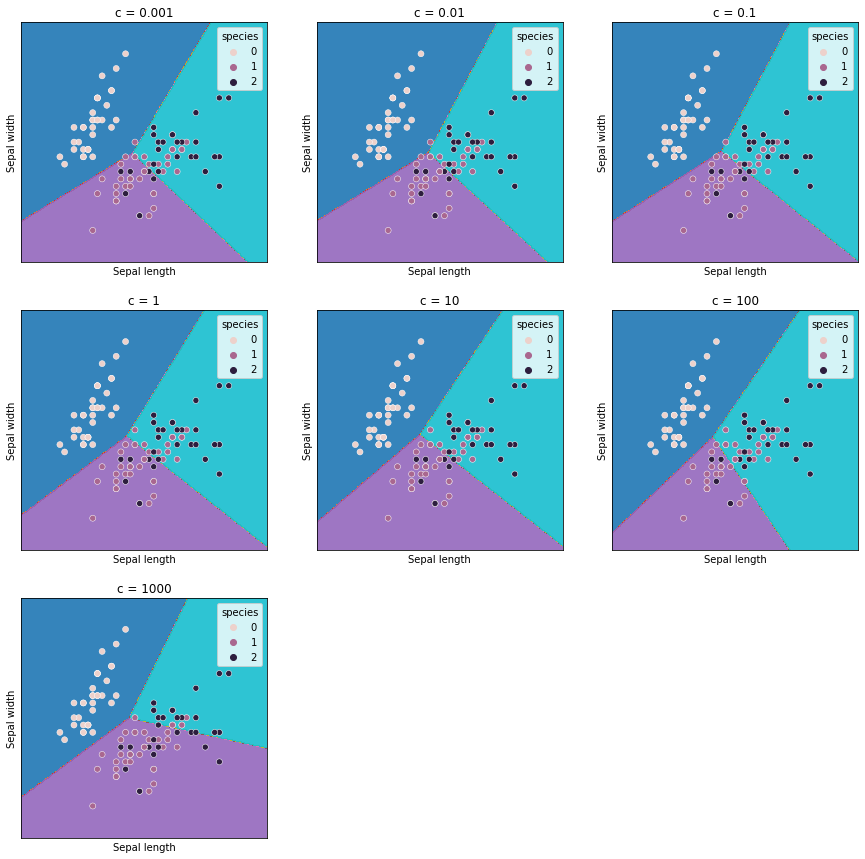

In [60]:
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

plt.figure(figsize=(15,15))
for i,c in enumerate(c):
    clf = LinearSVC(C=c, random_state=0, tol=1e-5).fit(X, y)
    print(f'c = {c}')
    get_accuracy(clf)
    print('-'*50)

    plt.subplot(3, 3, i + 1)
    Plot_decision_surface(X, y,
                    model = clf,
                    title = f'c = {c}' ,
                    xlabel = 'Sepal length',
                    ylabel='Sepal width',
                    create_figure=False, figsize=(5,5),
                    step=0.02, alpha=0.9, set_ticks = False,
                    cmap=plt.cm.tab10)

![](2021-09-13-13-48-59.png)
![](2021-09-13-13-54-37.png)
![](2021-09-13-13-50-10.png)
![](2021-09-13-13-56-22.png)
![](2021-09-13-14-17-50.png)
* Step 1. Find a normal vector to the decision boundary;
* Step 2. Calculate a unit vector of that normal vector -- let's call it `w_hat`;
* Step 3. Get a distance between the lines (margin);
* Step 4. Translate all points of the decision boundary to a new location by this formula:
- new_points_above = hyperplane_points + w_hat * margin
- new_points_below = hyperplane_points - w_hat * margin

In [61]:
def plot_decision_boundary(X, y, model, title, xlabel, ylabel, x_point=True, x_points=[]):
        # Plotting our two-features-space
        sns.scatterplot(X[:, 0], X[:, 1], hue =y, s=20);

        # Constructing a hyperplane using a formula.
        w = model.coef_[0]           # w consists of 2 elements
        b = model.intercept_[0]      # b consists of 1 element

        # generating x-points
        if not x_point:
                x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
                x_points = np.linspace(x_min, x_max)
        else:
                x_points = x_points
        # getting corresponding y-points
        y_points = -(w[0] / w[1]) * x_points - b / w[1]

        # Plotting a red hyperplane
        plt.plot(x_points, y_points, c='r');

        # Encircle support vectors
        plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=50,
                facecolors='none',
                edgecolors='k',
                alpha=.5);

        # Step 2 (unit-vector):
        w_hat = model.coef_[0] / np.linalg.norm(model.coef_[0] ,2)
        # Step 3 (margin):
        margin = 1 / np.linalg.norm(model.coef_[0] ,2)
        # Step 4 (calculate points of the margin lines):
        decision_boundary_points = np.array(list(zip(x_points, y_points)))
        points_of_line_above = decision_boundary_points + w_hat * margin
        points_of_line_below = decision_boundary_points - w_hat * margin
        # Plot margin lines
        # Blue margin line above
        plt.plot(points_of_line_above[:, 0],
                points_of_line_above[:, 1],
                'b--',
                linewidth=2)
        # Green margin line below
        plt.plot(points_of_line_below[:, 0],
                points_of_line_below[:, 1],
                'g--',
                linewidth=2)

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)

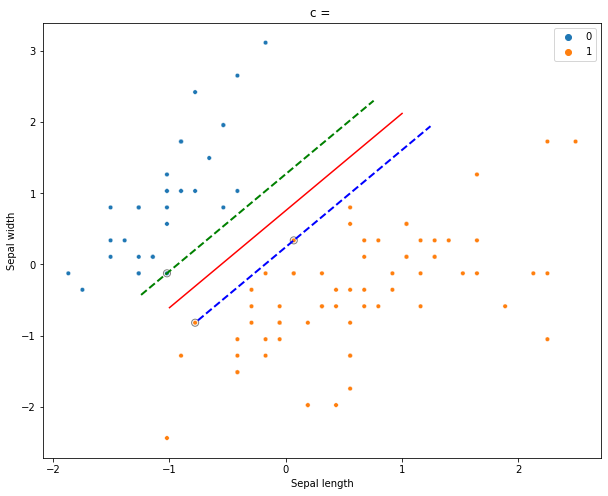

In [62]:
y_modified = np.where(y==0,0,1)
clf = SVC(kernel='linear',C=100).fit(X, y_modified)

plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y_modified, clf,
                        title = f'c = ' ,
                        xlabel = 'Sepal length',
                        ylabel='Sepal width',
                        x_point=True, x_points=np.linspace(-1, 1))

c = 0.001
Training Score            :  0.33
Test Score                :  0.34
--------------------------------------------------
c = 0.01
Training Score            :   0.6
Test Score                :  0.58
--------------------------------------------------
c = 0.1
Training Score            :  0.67
Test Score                :  0.64
--------------------------------------------------
c = 1
Training Score            :  0.67
Test Score                :  0.64
--------------------------------------------------
c = 10
Training Score            :  0.67
Test Score                :  0.64
--------------------------------------------------
c = 100
Training Score            :  0.67
Test Score                :  0.64
--------------------------------------------------
c = 1000
Training Score            :  0.67
Test Score                :  0.64
--------------------------------------------------


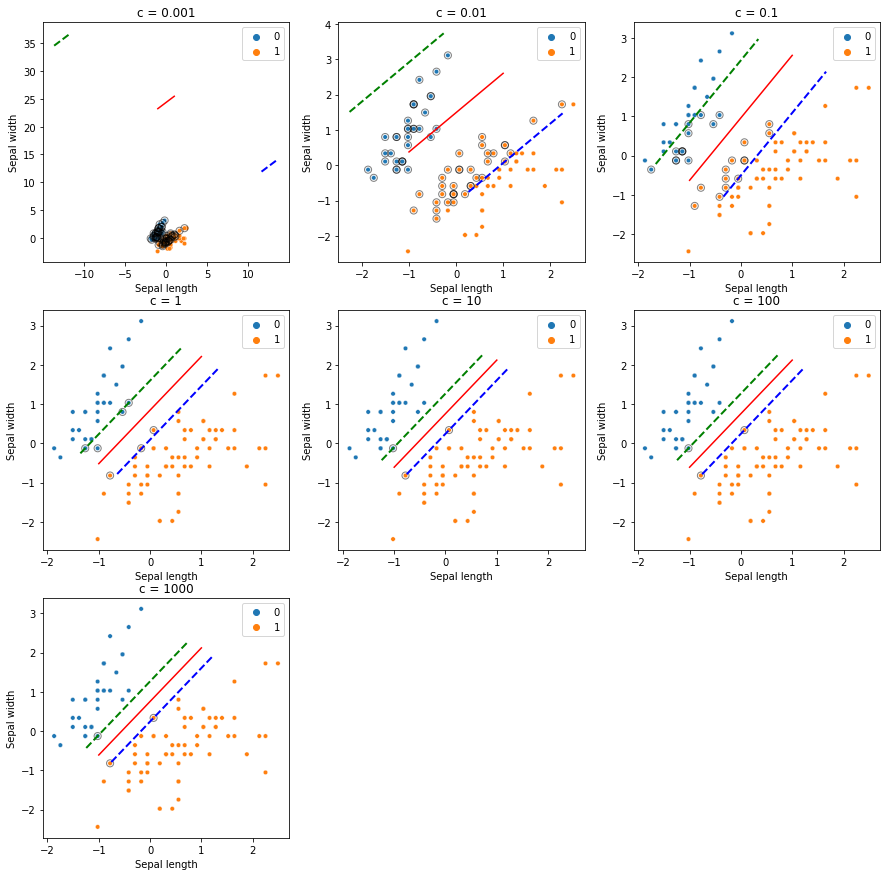

In [63]:
# 'LinearSVC' object has no attribute 'support_vectors_'

c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
y_modified = np.where(y==0,0,1)
plt.figure(figsize=(15,15))

for i,c in enumerate(c):
    clf = SVC(kernel='linear', C=c, random_state=0, tol=1e-5).fit(X, y_modified)
    print(f'c = {c}')
    get_accuracy(clf)
    print('-'*50)

    plt.subplot(3, 3, i + 1)
    plot_decision_boundary(X, y_modified, clf,
                            title = f'c = {c}' ,
                            xlabel = 'Sepal length',
                            ylabel='Sepal width',
                            x_point=True, x_points=np.linspace(-1, 1))

## 2- RBF

In [64]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=5).fit(X, y)
get_accuracy(rbf_svc)

Training Score            :  0.82
Test Score                :  0.68


gamma = 0.001
Training Score            :  0.34
Test Score                :  0.32
--------------------------------------------------
gamma = 0.01
Training Score            :  0.82
Test Score                :  0.68
--------------------------------------------------
gamma = 0.1
Training Score            :  0.79
Test Score                :  0.74
--------------------------------------------------
gamma = 1
Training Score            :  0.84
Test Score                :  0.68
--------------------------------------------------
gamma = 10
Training Score            :  0.89
Test Score                :  0.66
--------------------------------------------------
gamma = 100
Training Score            :  0.95
Test Score                :  0.46
--------------------------------------------------


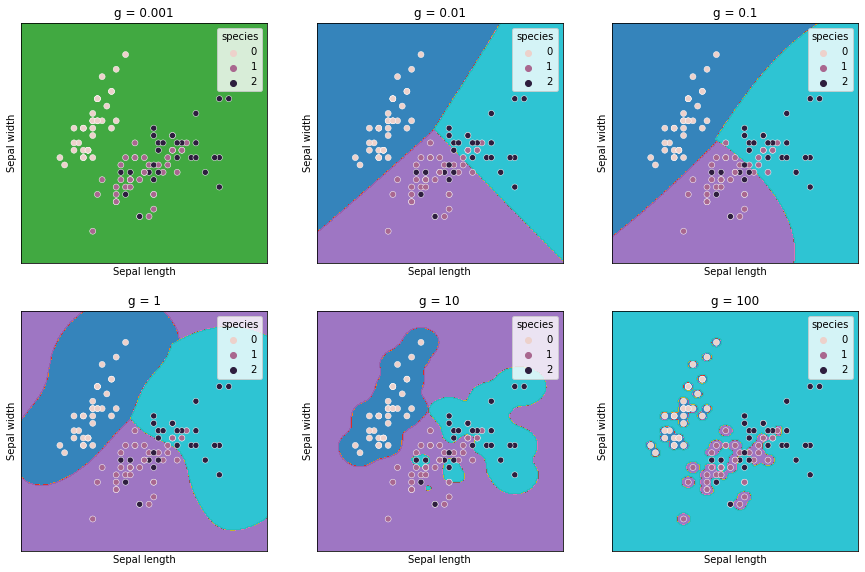

In [65]:
# c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

g = [0.001, 0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(15,15))
for i,g in enumerate(g):
    clf = svm.SVC(kernel='rbf', gamma=g, C=1).fit(X, y)
    print(f'gamma = {g}')
    get_accuracy(clf)
    print('-'*50)

    plt.subplot(3, 3, i + 1)
    Plot_decision_surface(X, y,
                    model = clf,
                    title = f'g = {g}' ,
                    xlabel = 'Sepal length',
                    ylabel='Sepal width',
                    create_figure=False, figsize=(5,5),
                    step=0.02, alpha=0.9, set_ticks = False,
                    cmap=plt.cm.tab10)

## 3- polynomial

In [66]:
d = [1,2,3,4,5,6]

for i,d in enumerate(d):
    clf = SVC(kernel='poly', degree=d, C=10).fit(X, y)
    print(f'degree = {d}')
    get_accuracy(clf)
    print('-'*50)


degree = 1
Training Score            :  0.79
Test Score                :  0.74
--------------------------------------------------
degree = 2
Training Score            :   0.6
Test Score                :  0.56
--------------------------------------------------
degree = 3
Training Score            :  0.79
Test Score                :  0.72
--------------------------------------------------
degree = 4
Training Score            :  0.65
Test Score                :  0.52
--------------------------------------------------
degree = 5
Training Score            :  0.78
Test Score                :  0.68
--------------------------------------------------
degree = 6
Training Score            :  0.65
Test Score                :  0.54
--------------------------------------------------


In [67]:
lin_svc = svm.LinearSVC(C=1).fit(X, y)
get_accuracy(lin_svc)

Training Score            :  0.78
Test Score                :  0.78


In [68]:
mat = confusion_matrix(y_test, lin_svc.predict(X_test))
mat

array([[15,  1,  0],
       [ 2, 12,  3],
       [ 0,  5, 12]], dtype=int64)

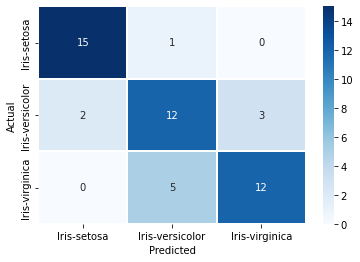

In [69]:
sns.heatmap(mat, annot=True, linewidths=0.1, cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_,)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
report = classification_report(y_test, lin_svc.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.67      0.71      0.69        17
           2       0.80      0.71      0.75        17

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



## 5- Plot the decision surface for four SVM classifiers with different kernels

In [71]:
c= 1

svc = SVC(kernel='linear',C=1).fit(X, y)
lin_svc= LinearSVC(C=c, random_state=0, tol=1e-5).fit(X, y)
rbf_svc= svm.SVC(kernel='rbf', gamma=1, C=c).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=c).fit(X, y)

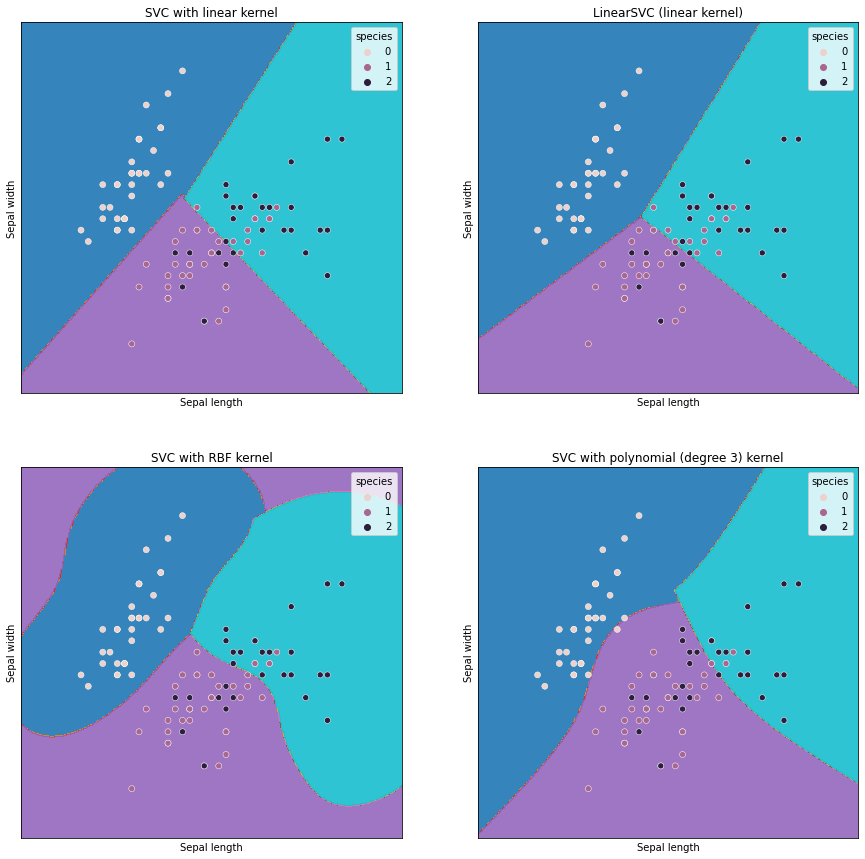

In [72]:
# title for the plots
titles = ['SVC with linear kernel',
        'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        plt.subplot(2, 2, i + 1)
        Plot_decision_surface(X, y,
                        model = clf,
                        title = titles[i] ,
                        xlabel = 'Sepal length',
                        ylabel='Sepal width',
                        create_figure=False, figsize=(5,5),
                        step=0.02, alpha=0.9, set_ticks = False,
                        cmap=plt.cm.tab10)